<a href="https://colab.research.google.com/github/wasekovi/Task-Manager-with-priority-tracking/blob/main/tmpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import json
import csv
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


FILE_NAME = "tasks.json"


def load_tasks():

    try:
        with open(FILE_NAME, "r") as file:
            return json.load(file)
    except FileNotFoundError:
        return []

def save_tasks(tasks):

    with open(FILE_NAME, "w") as file:
        json.dump(tasks, file, indent=4)

def add_task():

    tasks = load_tasks()
    title = input("Enter Task Title: ")
    description = input("Enter Task Description: ")
    priority = input("Enter Priority Level (High/Medium/Low): ").capitalize()
    if priority not in ["High", "Medium", "Low"]:
        print("Invalid priority level. Task not added.")
        return

    deadline = input("Enter Deadline (YYYY-MM-DD) (optional): ")
    if deadline:
        try:
            deadline = datetime.strptime(deadline, "%Y-%m-%d").strftime("%Y-%m-%d")
        except ValueError:
            print("Invalid date format. Task not added.")
            return

    task = {
        "id": len(tasks) + 1,
        "title": title,
        "description": description,
        "priority": priority,
        "deadline": deadline if deadline else None,
        "status": "Pending"
    }
    tasks.append(task)
    save_tasks(tasks)
    print("Task added successfully!")

def update_task_status():

    tasks = load_tasks()
    if not tasks:
        print("No tasks available to update.")
        return

    print("\nCurrent Tasks:")
    for task in tasks:
        print(f"ID: {task['id']} | Title: {task['title']} | Status: {task['status']}")

    try:
        task_id = int(input("Enter the ID of the task to update: "))
        task = next((t for t in tasks if t["id"] == task_id), None)
        if not task:
            print("Task ID not found.")
            return

        print("\nUpdate Status:")
        print("1. Pending")
        print("2. In Progress")
        print("3. Completed")
        choice = input("Choose new status: ")

        if choice == "1":
            task["status"] = "Pending"
        elif choice == "2":
            task["status"] = "In Progress"
        elif choice == "3":
            task["status"] = "Completed"
        else:
            print("Invalid choice.")
            return

        save_tasks(tasks)
        print("Task status updated successfully!")
    except ValueError:
        print("Invalid task ID.")

def sort_tasks():

    tasks = load_tasks()
    if not tasks:
        print("No tasks available to sort.")
        return

    criteria = input("Enter sorting criteria (priority/deadline/status): ").lower()
    if criteria not in ["priority", "deadline", "status"]:
        print("Invalid criteria.")
        return

    sorted_tasks = sorted(tasks, key=lambda x: (x[criteria] or "") if criteria in x else "")
    print(f"\nTasks sorted by {criteria}:")
    for task in sorted_tasks:
        print(f"ID: {task['id']} | Title: {task['title']} | Priority: {task['priority']} | Deadline: {task['deadline']} | Status: {task['status']}")

def filter_tasks():

    tasks = load_tasks()
    if not tasks:
        print("No tasks available to filter.")
        return

    criteria = input("Enter filter criteria (priority/status): ").lower()
    if criteria not in ["priority", "status"]:
        print("Invalid criteria.")
        return

    value = input(f"Enter value for {criteria}: ").capitalize()
    filtered_tasks = [task for task in tasks if task[criteria].lower() == value.lower()]
    print(f"\nFiltered Tasks by {criteria} = {value}:")
    for task in filtered_tasks:
        print(f"ID: {task['id']} | Title: {task['title']} | Priority: {task['priority']} | Deadline: {task['deadline']} | Status: {task['status']}")

def check_reminders():

    tasks = load_tasks()
    if not tasks:
        print("No tasks available.")
        return

    today = datetime.now().date()
    print("\nReminders:")
    for task in tasks:
        if task["deadline"]:
            deadline_date = datetime.strptime(task["deadline"], "%Y-%m-%d").date()
            days_remaining = (deadline_date - today).days

            if days_remaining < 0:
                print(f"Overdue: {task['title']} (Deadline: {task['deadline']})")
            elif days_remaining <= 3:
                print(f"Upcoming: {task['title']} (Deadline: {task['deadline']})")

def generate_reports():

    tasks = load_tasks()
    total_tasks = len(tasks)
    completed_tasks = len([task for task in tasks if task["status"] == "Completed"])
    pending_tasks = len([task for task in tasks if task["status"] == "Pending"])
    grouped_by_priority = {
        "High": len([task for task in tasks if task["priority"] == "High"]),
        "Medium": len([task for task in tasks if task["priority"] == "Medium"]),
        "Low": len([task for task in tasks if task["priority"] == "Low"])
    }

    print("\nAnalytics and Reports:")
    print(f"Total Tasks: {total_tasks}")
    print(f"Completed Tasks: {completed_tasks}")
    print(f"Pending Tasks: {pending_tasks}")
    print("Tasks Grouped by Priority:")
    for priority, count in grouped_by_priority.items():
        print(f"{priority}: {count}")


    with open("task_reports.csv", "w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Total Tasks", "Completed Tasks", "Pending Tasks"])
        writer.writerow([total_tasks, completed_tasks, pending_tasks])
        writer.writerow([])
        writer.writerow(["Priority", "Count"])
        for priority, count in grouped_by_priority.items():
            writer.writerow([priority, count])
    print("\nReports saved to 'task_reports.csv'.")

def add_recurring_task():

    tasks = load_tasks()
    title = input("Enter Task Title: ")
    description = input("Enter Task Description: ")
    priority = input("Enter Priority Level (High/Medium/Low): ").capitalize()
    if priority not in ["High", "Medium", "Low"]:
        print("Invalid priority level. Task not added.")
        return

    recurring_type = input("Enter recurrence (daily/weekly): ").lower()
    if recurring_type not in ["daily", "weekly"]:
        print("Invalid recurrence type. Task not added.")
        return

    base_date = input("Enter Start Date (YYYY-MM-DD): ")
    try:
        start_date = datetime.strptime(base_date, "%Y-%m-%d")
    except ValueError:
        print("Invalid date format. Task not added.")
        return

    days_to_add = 1 if recurring_type == "daily" else 7
    for i in range(5):
        task_date = (start_date + timedelta(days=i * days_to_add)).strftime("%Y-%m-%d")
        task = {
            "id": len(tasks) + 1 + i,
            "title": f"{title} (Occurrence {i + 1})",
            "description": description,
            "priority": priority,
            "deadline": task_date,
            "status": "Pending",
            "tags": []
        }
        tasks.append(task)

    save_tasks(tasks)
    print("Recurring task added successfully!")


def generate_task_visualizations():

    tasks = load_tasks()
    if not tasks:
        print("No tasks available for visualization.")
        return


    status_counts = {"Pending": 0, "In Progress": 0, "Completed": 0}
    priority_counts = {"High": 0, "Medium": 0, "Low": 0}

    for task in tasks:
        status_counts[task["status"]] += 1
        priority_counts[task["priority"]] += 1


    print("\nGenerating Task Distribution Charts...")
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))


    axes[0].bar(status_counts.keys(), status_counts.values(), color=["blue", "orange", "green"])
    axes[0].set_title("Task Distribution by Status")
    axes[0].set_xlabel("Status")
    axes[0].set_ylabel("Count")


    axes[1].bar(priority_counts.keys(), priority_counts.values(), color=["red", "yellow", "green"])
    axes[1].set_title("Task Distribution by Priority")
    axes[1].set_xlabel("Priority")
    axes[1].set_ylabel("Count")

    plt.tight_layout()
    plt.show()


def tag_task():

    tasks = load_tasks()
    if not tasks:
        print("No tasks available.")
        return

    print("\nCurrent Tasks:")
    for task in tasks:
        print(f"ID: {task['id']} | Title: {task['title']} | Tags: {', '.join(task.get('tags', []))}")

    try:
        task_id = int(input("Enter the ID of the task to tag: "))
        task = next((t for t in tasks if t["id"] == task_id), None)
        if not task:
            print("Task ID not found.")
            return

        new_tags = input("Enter tags (comma-separated): ").split(",")
        task["tags"] = task.get("tags", []) + [tag.strip() for tag in new_tags if tag.strip()]
        save_tasks(tasks)
        print("Tags added successfully!")
    except ValueError:
        print("Invalid task ID.")

def filter_by_tags():

    tasks = load_tasks()
    if not tasks:
        print("No tasks available.")
        return

    tag = input("Enter the tag to filter by: ").strip()
    filtered_tasks = [task for task in tasks if tag in task.get("tags", [])]

    if not filtered_tasks:
        print(f"No tasks found with the tag '{tag}'.")
    else:
        print(f"\nTasks with the tag '{tag}':")
        for task in filtered_tasks:
            print(f"ID: {task['id']} | Title: {task['title']} | Tags: {', '.join(task.get('tags', []))}")



Task Manager Menu
1. Add Task
2. Update Task Status
3. Sort Tasks
4. Filter Tasks
5. Check Reminders
6. Generate Reports
7. Add Recurring Task
8. Visualize Tasks
9. Add Tags to Task
10. Filter Tasks by Tags
11. Exit
Choose an option: 8

Generating Task Distribution Charts...


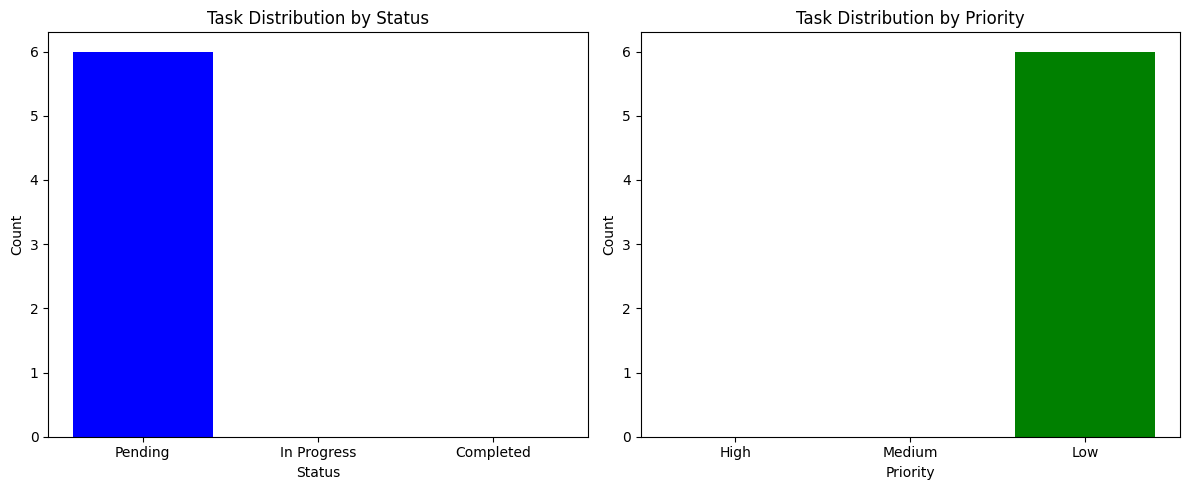


Task Manager Menu
1. Add Task
2. Update Task Status
3. Sort Tasks
4. Filter Tasks
5. Check Reminders
6. Generate Reports
7. Add Recurring Task
8. Visualize Tasks
9. Add Tags to Task
10. Filter Tasks by Tags
11. Exit
Choose an option: 6

Analytics and Reports:
Total Tasks: 6
Completed Tasks: 0
Pending Tasks: 6
Tasks Grouped by Priority:
High: 0
Medium: 0
Low: 6

Reports saved to 'task_reports.csv'.

Task Manager Menu
1. Add Task
2. Update Task Status
3. Sort Tasks
4. Filter Tasks
5. Check Reminders
6. Generate Reports
7. Add Recurring Task
8. Visualize Tasks
9. Add Tags to Task
10. Filter Tasks by Tags
11. Exit
Choose an option: 4
Enter filter criteria (priority/status): priority
Enter value for priority: 1

Filtered Tasks by priority = 1:

Task Manager Menu
1. Add Task
2. Update Task Status
3. Sort Tasks
4. Filter Tasks
5. Check Reminders
6. Generate Reports
7. Add Recurring Task
8. Visualize Tasks
9. Add Tags to Task
10. Filter Tasks by Tags
11. Exit
Choose an option: 4
Enter filter 

In [12]:

def main_menu():

    while True:
        print("\nTask Manager Menu")
        print("1. Add Task")
        print("2. Update Task Status")
        print("3. Sort Tasks")
        print("4. Filter Tasks")
        print("5. Check Reminders")
        print("6. Generate Reports")
        print("7. Add Recurring Task")
        print("8. Visualize Tasks")
        print("9. Add Tags to Task")
        print("10. Filter Tasks by Tags")

        print("11. Exit")
        choice = input("Choose an option: ")

        if choice == "1":
            add_task()
        elif choice == "2":
            update_task_status()
        elif choice == "3":
            sort_tasks()
        elif choice == "4":
            filter_tasks()
        elif choice == "5":
            check_reminders()
        elif choice == "6":
            generate_reports()
        elif choice == "7":
            add_recurring_task()
        elif choice == "8":
            generate_task_visualizations()
        elif choice == "9":
            tag_task()
        elif choice == "10":
            filter_by_tags()
        elif choice == "11":
            print("Exiting Task Manager.")
            break
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main_menu()
